In [1]:
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_ind
from scipy.stats import spearmanr

In [2]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

**1.Объедините два массива в DataFrame.** 

In [3]:
data = pd.DataFrame({'petersburg': petersburg})
data1 = pd.DataFrame({'magadan': magadan})
data = pd.concat([data, data1], axis=1)
data['petersburg']=round(data['petersburg'].fillna(data['petersburg'].mean()), 4) # Заменяем пропущенные знаения на среднее по столбцу.

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

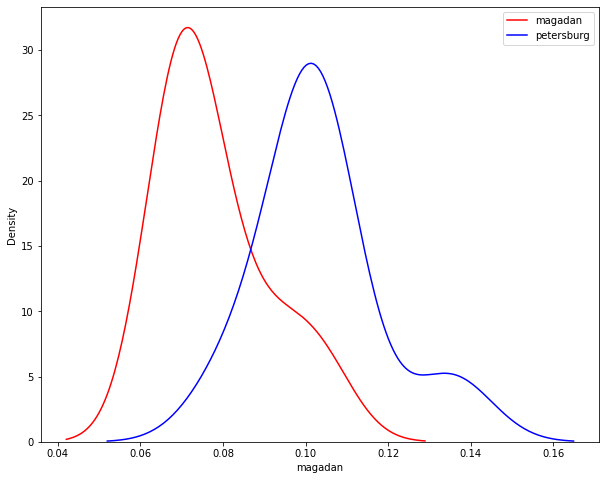

In [31]:
fig = plt.subplots(ncols=1, figsize=(10, 8))
sns.kdeplot(data['magadan'], label='magadan', color= 'red')
sns.kdeplot(data['petersburg'], label='petersburg', color= 'blue')
plt.legend()

На графике видно что данные распределены нормально.

Проверем вывод с помошью тестов на нормальность

In [6]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'
alpha = 0.05

In [7]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.100
Данные распределены нормально


In [8]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.042
Данные распределены нормально


c:\Users\d3en\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


**3. Сделайте вывод по гипотезе.**

Вывод по гипотезе можно сделать такой, что нам подходит нулевая гипотеза, то есть данные рапределены нормально.

2. Обоснуйте выбор теста на корреляцию. 

### <center> Для непрерывнывного нормально распределённых используем корреляцию Пирсона

In [9]:
from scipy.stats import pearsonr 

In [22]:
corr, _ = pearsonr(data['petersburg'], data['magadan'])
print(f'Корреляция Пирсона равна {round(corr, 6)}')

Корреляция Пирсона равна 0.244845


Проверем себя способом из библиотеки pandas

In [17]:
data.corr()

,petersburg,magadan
petersburg,1.000000,0.244845
magadan,0.244845,1.000000


### <center> Тест на сравнение выборок

**5.Обоснуйте выбор теста.**

Зависимая переменная (размер раковины мидии) является количественной. Группы происходят из разных совокупностей. Обьектов в выборках < 30. Следовательно, мы используем независимый T-тест.

In [14]:
H0 = 'Нет значимой разницы между размерами раковин мидий в Санкт-Петербурге и Магадане.'
Ha = 'Есть значимая разница между размерами раковин мидий в Санкт-Петербурге и Магадане.'

**4. Ответьте на вопрос: Какова разница в среднем размере мидии в зависимости от города-производителя**

In [37]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['petersburg'], data['magadan'], equal_var=True)
    
    p = round(test_results[1],4)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.0027 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами раковин мидий в Санкт-Петербурге и Магадане.


**6. Сделайте вывод по гипотезе.**

Вывод по гипотезе можно сделать такой, что разница между размера раковин мидий в Санкт-Петербурге и Магадане значимая.

In [38]:
from scipy.stats import f_oneway

In [39]:
_, p = f_oneway(petersburg, magadan)

In [40]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [41]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.004940324868384318 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.
